# Рынок заведений общественного питания Москвы

Исследуем текущий рынок заведений общественного питания Москвы для определения вида будущего заведения, количества посадочных мест, а также района расположения.

## Содержание. 
1. [Подготовка данных](#paragraph1)
2. [Анализ данных](#paragraph2)
3. [Соотношение видов объектов общественного питания по количеству](#paragraph3)
4. [Соотношение сетевых и несетевых заведений по количеству](#paragraph4)
5. [Распределение сетевых заведений по типам объектов](#paragraph5) 
6. [Распределение сетевых заведений по количеству посадочных мест](#paragraph6)
7. [Среднее количество посадочных мест для каждого типа объекта](#paragraph7)
8. [Анализ топ-10 улиц и их районов](#paragraph8)
9. [Число улиц с одним объектом общественного питания. И их районы.](#paragraph9) 
10. [Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания](#paragraph10) 
11. [Вывод](#paragraph11) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from io import BytesIO
import requests

In [2]:
warnings.filterwarnings("ignore")

In [3]:
try:
    df = pd.read_csv('/datasets/rest_data.csv')
except FileNotFoundError:
    df = pd.read_csv('rest_data.csv')

## Подготовка данных. <a name="paragraph1"></a>

In [4]:
display(df.head())
display(df.info())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

In [5]:
df.duplicated().sum()

0

In [6]:
df['id'].duplicated().sum()

0

Проверим на наличие скрытых дубликатов в названиях.

Сгуппируем по адресам, проверим вручную несколько адресов с самым большим количеством заведений.

In [7]:
df.groupby('address')['id'].count().sort_values(ascending=False).head(20)

address
город Москва, Ходынский бульвар, дом 4                                       95
город Москва, Пресненская набережная, дом 2                                  63
город Москва, проспект Мира, дом 211, корпус 2                               60
город Москва, Кировоградская улица, дом 13А                                  53
город Москва, площадь Киевского Вокзала, дом 2                               48
город Москва, улица Земляной Вал, дом 33                                     46
город Москва, Мытная улица, дом 74                                           46
город Москва, улица Новый Арбат, дом 21                                      42
город Москва, улица Ленинская Слобода, дом 26                                41
город Москва, Ярцевская улица, дом 19                                        40
город Москва, Кутузовский проспект, дом 57                                   40
город Москва, Манежная площадь, дом 1, строение 2                            38
город Москва, Нижняя Красносельс

In [8]:
qq = list(df[df['address'] == 'город Москва, Пресненская набережная, дом 2']['object_name'])
sorted(qq, key=str.lower)

['Dunkin Donuts',
 'KFC',
 'OnePriceCoffee',
 'SANDERS GRILL',
 'Starbucks',
 'Starbucks',
 'Sushilka',
 'UPSIDE DOWN CAKE',
 'Бар «Mad Men Bar»',
 'Бургер Кинг',
 'Галата',
 'Даблби',
 'Додо Пицца',
 'Зю Кафе',
 'Иль Патио',
 'Кафе «Anadolu»',
 'Кафе «Bowler fresh bar»',
 'Кафе «Cinnabon»',
 'Кафе «DOBROSCO»',
 'Кафе «Georgian House»',
 'Кафе «Grill Kitchen»',
 'Кафе «M-city»',
 'Кафе «Ploft»',
 'Кафе «Russkii»',
 'Кафе «Sark sofrasi»',
 'Кафе «Sweety»',
 'Кафе «The House»',
 'Кафе «Yes pizza»',
 'Кафе «бургерная Farш»',
 'Кафе «Кальянная Москальян»',
 "Кафе «Левон'c»",
 'Кафе «Моё кафе»',
 'Кафе «Пепебьянко»',
 'Кафе «Сofix»',
 'Кафе «Суши-Маркет»',
 'Кафе «Три правила»',
 'Кафе «Три правила»',
 'Кафе «Хинкальная»',
 'Кафе «Эдоко»',
 'Кафетерий «La croisette»',
 'Корейское бистро «Инсам»',
 'Кофе Хаус',
 'Макдоналдс',
 'Неспрессо',
 'Островок «Super Mango Shake»',
 'Прайм-кафе',
 'Ресторан «Cosmik»',
 'Ресторан «Croydon»',
 'Ресторан «FORTE BELLO»',
 'Ресторан «Kabuki»',
 'Ресторан «

Проверка показала несколько проблем: Старбакс написан по-разному, Шоколадница дублируется и тоже написана по-разному, Макдоналдс дублируется. 
Очистим данные от дублей Название-адрес.

In [9]:
df['object_name'] = df['object_name'].apply(lambda x: x.lower())

In [10]:
list = ["кафе","ресторан","кофейня"]

def forbidden_words_remover(element):
    split_line = element.split()
    #print(split_line)
    for word in split_line:
        if word in list:
            split_line.remove(word)
    return ' '.join(split_line)

In [11]:
df['object_name'] = df['object_name'].apply(lambda x: forbidden_words_remover(x))

In [12]:
df['object_name'] = df['object_name'].apply(lambda x: x.lstrip('«'))
df['object_name'] = df['object_name'].apply(lambda x: x.rstrip('»'))
df['object_name'] = df['object_name'].apply(lambda x: x.lstrip())
df['object_name'] = df['object_name'].apply(lambda x: x.rstrip())

Привели все к нижнему регистру, убрали кавычки, пробелы, типы заведений из названий.

In [13]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [14]:
df.duplicated(subset=['object_name','address']).sum() # 240 таких дублей.

240

In [15]:
df = df.drop_duplicates(subset=['object_name','address']) 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15126 entries, 0 to 15364
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15126 non-null  int64 
 1   object_name  15126 non-null  object
 2   chain        15126 non-null  object
 3   object_type  15126 non-null  object
 4   address      15126 non-null  object
 5   number       15126 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 827.2+ KB


Удалось вычистить 240 таких дубликатов. 
Также бы замечены дубликаты названий на разных языках, но их доля мала, а подобрать универсальный метод поиска и очистки не представляется возможным. Принято решение их оставить.

Проверим на пропуски.

In [17]:
df.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Итого было удалено 240 дубликатов, пропусков не обнаружено.

## Анализ данных. <a name="paragraph2"></a>

In [18]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


## Соотношение видов объектов общественного питания по количеству. <a name="paragraph3"></a>

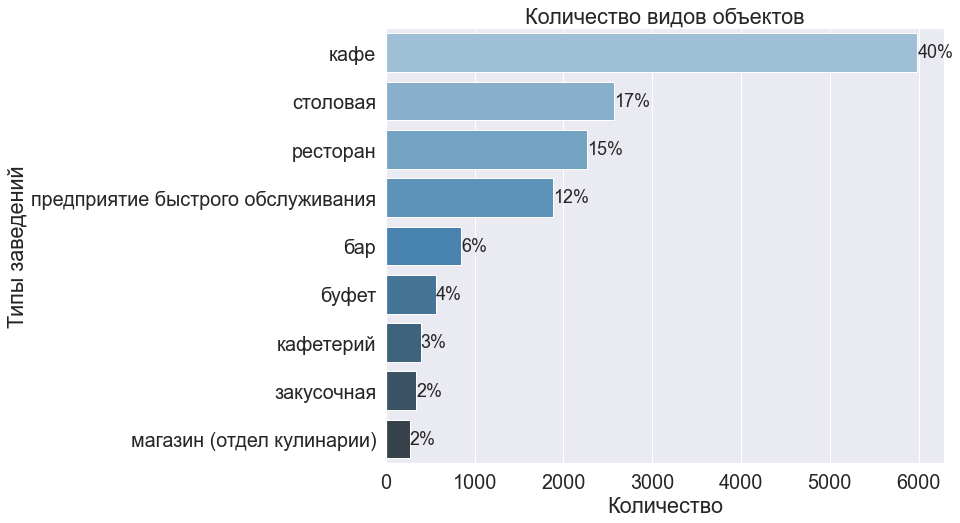

In [19]:
plt.figure(figsize=(10, 8))
sns.set_style("darkgrid") #Стиль
sns.set(font_scale=1.8) #размер шрифта подписей


ax = sns.countplot(
    y='object_type',
    order=df['object_type'].value_counts().index,
    data=df,
    palette="Blues_d"
)

for p in ax.patches:
    ax.annotate('{:.0%}'.format(p.get_width()/ len(df)), 
                   (p.get_width(), p.get_y() + p.get_height() / 2), 
                   ha = 'left', va = 'center', 
                   size=18,
                   xytext = (0, 0), 
                   textcoords = 'offset points')
    
ax.set_title('Количество видов объектов')
ax.set_ylabel('Типы заведений')
ax.set_xlabel('Количество')
plt.show()
#plt.savefig('saved_figure2.png', dpi = 100, bbox_inches='tight')

Преобладающий вид заведений - это кафе, доля заведений данного тип составляет 40% от всего рынка. Это связано с тем, что кафе наиболее универсальный формат среди всех представленных: помещение среднего размера, небольшое меню, как правило невысокие цены, при этом присутсвует обслуживание. Формат кафе позволяет реализовать на небольшой площади практические любые идеи по тематике и оформлению. В такие заведения люди чаще ходят за атмосферой и приятным врепрепровождением в уютной обстановке. 


Далее со схожими долями от 17 до 12% следуют столовые, рестораны и предприятия быстрого обслуживания. Остальные заведения занимают ниши менее 7% доли от рынка.

## Соотношение сетевых и несетевых заведений по количеству <a name="paragraph4"></a>

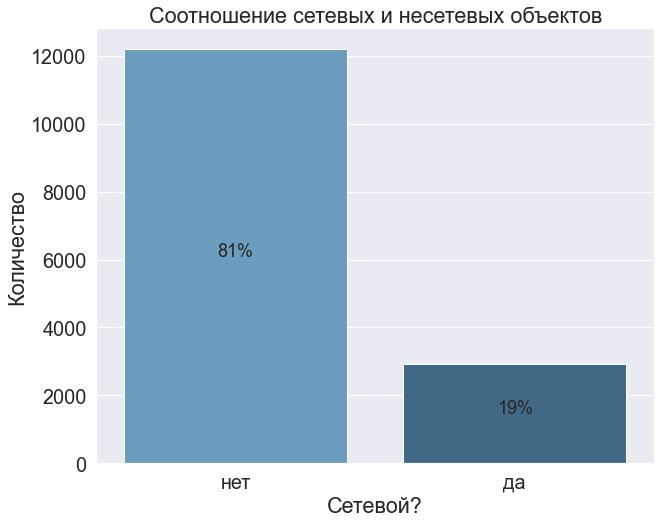

In [20]:
plt.figure(figsize=(10, 8))
 
ax = sns.countplot(
    x='chain', 
    data=df,
    palette="Blues_d"
)

for p in ax.patches:
    ax.annotate('{:.0%}'.format(p.get_height() / len(df)),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()/2), ha='center', va='center',
                   size=18, xytext=(0, 5),
                   textcoords='offset points')
ax.set_title('Соотношение сетевых и несетевых объектов')
ax.set_ylabel('Количество')
ax.set_xlabel('Сетевой?')
#plt.savefig('saved_figure3.png', dpi = 100, bbox_inches='tight')
plt.show()

Несетевых заведений в Москве в 4 раза больше, чем сетевых.

Причина кроется в цене и сложности управления. Сетевые заведения предполагают больше трат и также требовательны к соблюдениям внутренних стандартов и качества во всех заведениях сети. Чтобы отладить систему обучения и контроля на всех объектах, требуется большое количество средств. Смысл открывать сеть есть тогда, когда первое заведение зарекомендовало себя на рынке и работает успешно.

## Распределение сетевых заведений по типам объектов. <a name="paragraph5"></a>

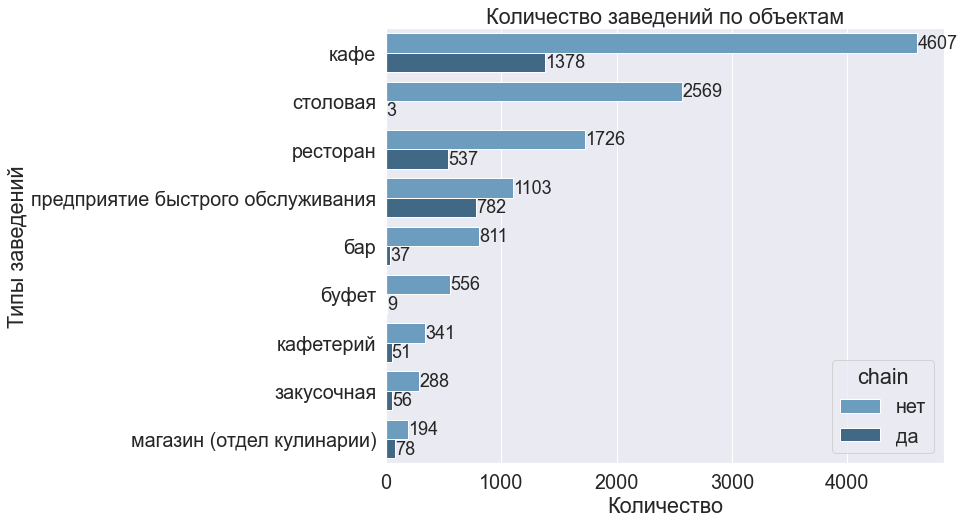

In [21]:
plt.figure(figsize=(10, 8))
sns.set_style("darkgrid") 
ax = sns.countplot(
    y='object_type', 
    hue='chain',
    order=df['object_type'].value_counts().index,
    data=df,
    palette="Blues_d"
)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()), 
                   (p.get_width(), p.get_y() + p.get_height() / 2.), 
                   ha = 'left', va = 'center', 
                   size=18,
                   xytext = (0, 0), 
                   textcoords = 'offset points')
    
ax.set_title('Количество заведений по объектам')
ax.set_ylabel('Типы заведений')
ax.set_xlabel('Количество')
#plt.savefig('saved_figure4.png', dpi = 100, bbox_inches='tight')
plt.show()

Распределение по типам в разрезе сетевой/несетевой также показало, что большинстве типах заведений преобладают несетевые точки. Так, несетевых кафе в 3,4 раза больше, чем сетевых.
Доля сетевых заведений крайне мала в таких типах как Буфеты и Столовые, потому что зачастую это места, относящиеся к учреждениям, в которых расположены.
Самую высокую же долю сетевых показывают Предприятия быстрого обслуживания. 

## Распределение сетевых заведений по количеству посадочных мест <a name="paragraph6"></a>

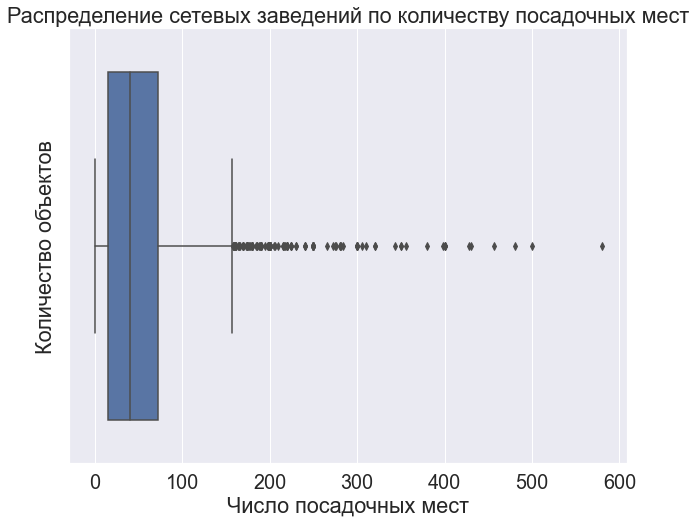

In [22]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='number', data=df[df['chain'] == 'да'])
ax.set_title("Распределение сетевых заведений по количеству посадочных мест")
ax.set_xlabel('Число посадочных мест')
ax.set_ylabel('Количество объектов')
#plt.savefig('saved_figure5.png', dpi = 100, bbox_inches='tight')
plt.show()

График распределения сетевых заведений по количеству посадочных мест показывает, что половина таких объектов способна уместить у себя до 40 человек (эта часть на первой половине ящика - медианное значение). 

Размер целого ящика на графике - это сосредоточение основной массы всех сетевых по количеству посадочных мест. Как видим, большая часть заведений имеет от 10 до 80 мест.

Можем сделать вывод, что для сетевых заведений характерно много заведений с небольшим числом посадочных мест в каждом.

##  Среднее количество посадочных мест для каждого типа объекта. <a name="paragraph7"></a>

In [23]:
df.groupby('object_type')['number'].mean().sort_values(ascending=False)

object_type
столовая                             130.457621
ресторан                              97.190455
буфет                                 51.660177
бар                                   43.629717
кафе                                  39.932331
предприятие быстрого обслуживания     20.743767
кафетерий                              9.155612
закусочная                             6.904070
магазин (отдел кулинарии)              5.610294
Name: number, dtype: float64

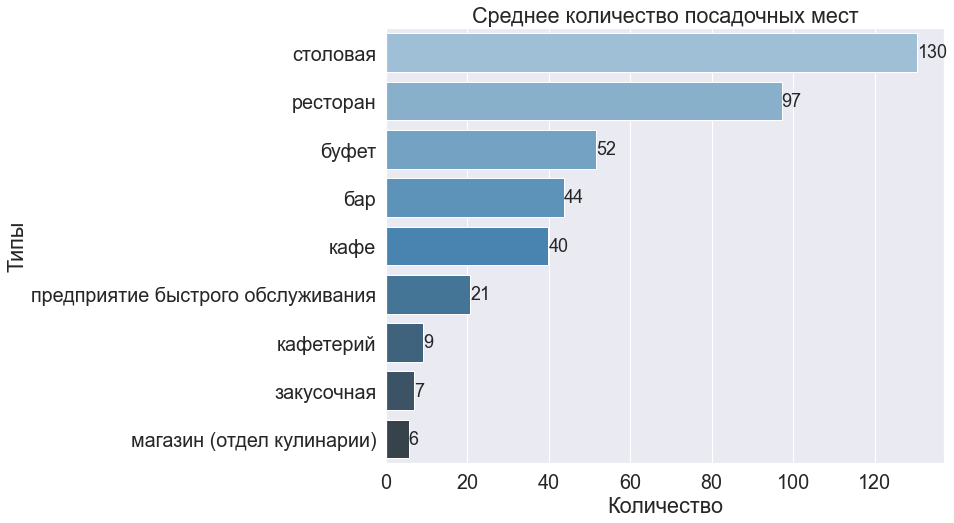

In [24]:
plt.figure(figsize=(10, 8))

ax = sns.barplot(
    y='object_type',
    x = 'number',
    order = df.groupby('object_type')['number'].mean().sort_values(ascending=False).index,
    data=df,
    ci=None,
    palette="Blues_d"
)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()), 
                   (p.get_width(), p.get_y() + p.get_height() / 2.), 
                   ha = 'left', va = 'center', 
                   size=18,
                   xytext = (0, 0), 
                   textcoords = 'offset points')
    
ax.set_title('Среднее количество посадочных мест')
ax.set_ylabel('Типы')
ax.set_xlabel('Количество')
#plt.savefig('saved_figure6.png', dpi = 100, bbox_inches='tight')
plt.show()

Если взглянуть на средние показатели количества посадочных мест по типам объектов, то увидим, что тут лидирующие позиции у Столовых и Ресторанов. В столовых высокая концентрация людей в связи с тем, что они располагаются близи учебных учреждений или в бизнес-центрах.
Рестораны располагают большим количеством мест для проведения больших мероприятий. Хотя как раз категория Ресторана среди всех самая нестабильная, потому что они могут быть как небольшими (с 40 местами как кафе), так и огромными заведениями на несколько этажей.

Самый подходящий для нас вариант - кафе с 40 местами в среднем. Этот показатель не самый маленький, чтобы уместить всех желающих, и не самый большой, чтобы  нести большие затраты на крупное помещение.

## Анализ топ-10 улиц и их районов. <a name="paragraph8"></a>

### Выделим в отдельный столбец информацию об улице.

Напишем функцию, которая добавляет город к тем строкам, где по какой-то причинее город не был указан.

In [25]:
def add_city(element):
    if not 'город Москва' in element:
        #print(type(element))
        new_address = 'город Москва, ' + element
        #print(type(new_address))
        return new_address
    else:
        return element

Напишем функцию, которая выделяет улицу. 
Отдельным условием обработаем Зеленоград и поселения в составе Москвы. 

In [26]:
def sptittinng(element):
    if 'поселение' in element:
        return element.split(', ')[2]
    if 'город Зеленоград' in element:
        return element.split(', ')[2]
    else:
        return element.split(', ')[1]

In [27]:
df['street'] = df['address'].apply(sptittinng)

In [28]:
streets = df.groupby('street')['id'].count().sort_values(ascending=False).reset_index()

## Топ-10 улиц по количеству объектов общественного питания

In [29]:
top_10_streets = streets.head(10)

In [30]:
top_10_streets

,street,id
0,проспект Мира,195
1,Профсоюзная улица,179
2,Ленинградский проспект,168
3,Пресненская набережная,164
4,Варшавское шоссе,160
5,Ленинский проспект,147
6,проспект Вернадского,126
7,Кутузовский проспект,112
8,Каширское шоссе,110
9,Кировоградская улица,106


In [31]:
print('Доля от общего числа заведений {:.2%}'.format(top_10_streets['id'].sum() / len(df)))

Доля от общего числа заведений 9.70%


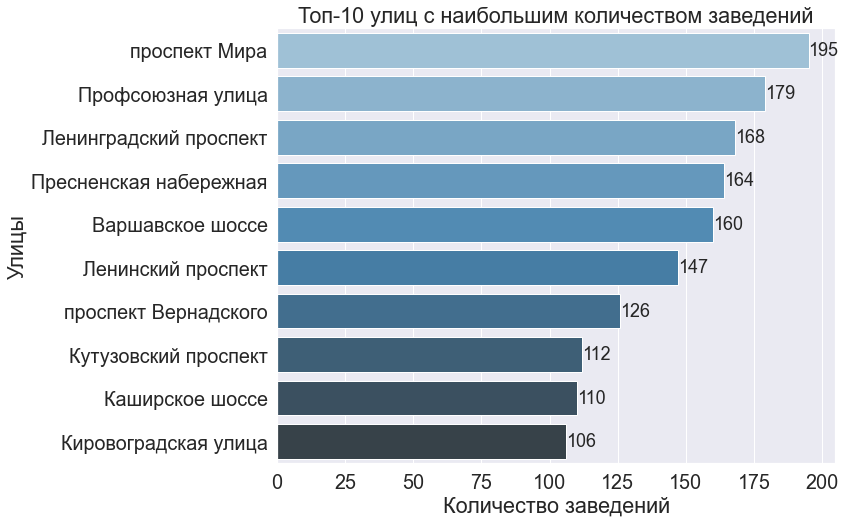

In [32]:
plt.figure(figsize=(10, 8))
 
ax = sns.barplot(
    x='id',
    y='street', 
    data=top_10_streets,
    #data=df.query('street in @top_10_streets'),
    #с
    palette="Blues_d"
)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()), 
                   (p.get_width(), p.get_y() + p.get_height() / 2.), 
                   ha = 'left', va = 'center', 
                   size=18,
                   xytext = (0, 0), 
                   textcoords = 'offset points')
    
ax.set_title('Топ-10 улиц с наибольшим количеством заведений')
ax.set_ylabel('Улицы')
ax.set_xlabel('Количество заведений')
#plt.savefig('saved_figure7.png', dpi = 100, bbox_inches='tight')
plt.show()

Доля заведений на 10 популярнейших улицах Москвы составляет 9,7% от всех заведений города. Учитывая размеры Москвы, это очень высокий показатель.

Лидер рейтинга - Проспект Мира с 195 объектами, замыкает десятку Кировоградская улица со 106 объектами.
Такая концентрация связана с протяженностью улиц в первую очередь и с наличием на них торговых центров, где обычно присуствует высокое сосредоточение ресторанов, баров и кафе.

Прочитаем данные о районах из стороннего источника.

In [33]:
spreadsheet_id = '1hNHym0Wj3IOgCrs4lZ4fpcKa6Hb8teOZqaG-JHJp2BY'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data = pd.read_csv(BytesIO(r.content))
data.head()

,global_id,ID,Name,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geoData,geodata_center
0,637376221,151635,СМЕТАНА,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",[{'PublicPhone': '(499) 183-14-10'}],48,нет,37.714565,55.879002,"{'coordinates': [37.714565000436, 55.879001531...","{'type': 'geometry', 'value': '010100000098DEA..."
1,637376331,77874,Родник,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",[{'PublicPhone': '(495) 676-55-35'}],35,нет,37.673306,55.738239,"{'coordinates': [37.6733061300344, 55.73823865...","{'type': 'geometry', 'value': '0101000000D7583..."
2,637376349,24309,Кафе «Академия»,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, Абельмановская улица, дом 6",[{'PublicPhone': '(495) 662-30-10'}],95,нет,37.669648,55.735511,"{'coordinates': [37.6696475969381, 55.73551147...","{'type': 'geometry', 'value': '0101000000D9583..."
3,637376480,27429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",[{'PublicPhone': '(499) 908-06-15'}],240,нет,37.566940,55.904019,"{'coordinates': [37.56694, 55.9040188006692], ...","{'type': 'geometry', 'value': '0101000000AA656..."
4,637376481,148815,Брусника,да,Брусника,кафе,Центральный административный округ,район Арбат,"город Москва, переулок Сивцев Вражек, дом 6/2",[{'PublicPhone': '(495) 697-04-89'}],10,нет,37.598128,55.747390,"{'coordinates': [37.59812754844, 55.7473904905...","{'type': 'geometry', 'value': '010100000076B18..."


In [34]:
data_district = data.loc[:, ['District', 'Address']] #датафрейм с улицами и районами

In [35]:
data_district.columns = data_district.columns.str.lower()

In [36]:
data_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17062 entries, 0 to 17061
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  17062 non-null  object
 1   address   17062 non-null  object
dtypes: object(2)
memory usage: 266.7+ KB


Подсчитаем и удалим дубликаты.

In [37]:
data_district.duplicated().sum()

7441

In [38]:
data_district = data_district.drop_duplicates()

In [39]:
data_district # датафрейм адрес-районы

,district,address
0,Ярославский район,"город Москва, улица Егора Абакумова, дом 9"
1,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1"
2,Таганский район,"город Москва, Абельмановская улица, дом 6"
3,район Лианозово,"город Москва, Угличская улица, дом 17"
4,район Арбат,"город Москва, переулок Сивцев Вражек, дом 6/2"
...,...,...
17051,Красносельский район,"Российская Федерация, город Москва, внутригоро..."
17052,район Южное Медведково,"город Москва, Полярная улица, дом 17, корпус 1"
17058,район Бибирево,"город Москва, улица Лескова, дом 8"
17059,Таганский район,"город Москва, Динамовская улица, дом 1А"


Присоединим датафрейм с районами по адресу

In [40]:
new_df = df.merge(data_district, how='left', left_on='address', right_on='address')

In [41]:
new_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15314 entries, 0 to 15313
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15314 non-null  int64 
 1   object_name  15314 non-null  object
 2   chain        15314 non-null  object
 3   object_type  15314 non-null  object
 4   address      15314 non-null  object
 5   number       15314 non-null  int64 
 6   street       15314 non-null  object
 7   district     13424 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.1+ MB


Есть пропуски в районах.

In [42]:
# будет нашей проверочной улицей
new_df[new_df['street'] == '1-я Магистральная улица']

,id,object_name,chain,object_type,address,number,street,district
6948,25219,ткс,нет,кафе,"город Москва, 1-я Магистральная улица, дом 18,...",40,1-я Магистральная улица,NaN
6975,27791,кейдер,нет,столовая,"город Москва, 1-я Магистральная улица, дом 23",50,1-я Магистральная улица,NaN


Заполним пропуски районов по улицам.

Выделяем улицу.

In [43]:
data_district['street'] = data_district['address'].apply(sptittinng)

In [44]:
a = data_district.loc[data_district.loc[:, 'street'] == '1-я Магистральная улица']['district'].iloc[0]

In [45]:
print(a) #вывод-проверка

Хорошёвский район


Заполняем пропуски.

In [46]:
all_streets = new_df['street'].unique() #переменная со списком улиц
for element in all_streets:
    x =  data_district.loc[data_district.loc[:, 'street'] ==  element]['district']
    if len(x) > 0:
        new_df.loc[(new_df['street'] == element)&(new_df['district'].isnull()), 'district'] = x.iloc[0]

In [47]:
new_df[new_df['street'] == '1-я Магистральная улица'] #проверка

,id,object_name,chain,object_type,address,number,street,district
6948,25219,ткс,нет,кафе,"город Москва, 1-я Магистральная улица, дом 18,...",40,1-я Магистральная улица,Хорошёвский район
6975,27791,кейдер,нет,столовая,"город Москва, 1-я Магистральная улица, дом 23",50,1-я Магистральная улица,Хорошёвский район


In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15314 entries, 0 to 15313
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15314 non-null  int64 
 1   object_name  15314 non-null  object
 2   chain        15314 non-null  object
 3   object_type  15314 non-null  object
 4   address      15314 non-null  object
 5   number       15314 non-null  int64 
 6   street       15314 non-null  object
 7   district     15117 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.1+ MB


Я специально присоединила сначала районы по адресам, а потом заполнила пропущенные по улицам. Я могла бы сделать проще и сразу проставила район только по улице, но тогда была бы утрачена важная особенность длинных улиц, которые охватывают несколько районов за раз.

## В каких районах эти улицы? 

In [49]:
top_10_streets_districts = top_10_streets.merge(new_df[['street', 'district']], how='inner', left_on='street', right_on='street').drop_duplicates()

In [50]:
top_10_streets_districts

,street,id,district
0,проспект Мира,195,Мещанский район
15,проспект Мира,195,Останкинский район
20,проспект Мира,195,Алексеевский район
37,проспект Мира,195,район Ростокино
79,проспект Мира,195,район Свиблово
195,Профсоюзная улица,179,Академический район
203,Профсоюзная улица,179,район Черёмушки
208,Профсоюзная улица,179,район Тёплый Стан
213,Профсоюзная улица,179,район Коньково
235,Профсоюзная улица,179,Обручевский район


In [51]:
top_10_streets_districts['district'].nunique() # сколько районов охватывают

37

Особеность наших топ-10 улиц заключается в их протяженности. Почти каждая (кроме Пресненской набережной) охватывает сразу несколько районов. В сумме этих районов 37. Поэтому и заведений на каждой из них много. При выборе места размещения стоит ориентироваться на районы, расположенные ближе к центру.

## Число улиц с одним объектом общественного питания. И их районы. <a name="paragraph9"></a>

In [52]:
print('Количество улиц с единственным заведением', streets[streets['id'] == 1]['id'].count())

Количество улиц с единственным заведением 712


In [53]:
one_object_streets = streets.query('id == 1')

In [54]:
one_object_streets_districts = one_object_streets.merge(new_df[['street', 'district']], how='inner', left_on='street', right_on='street').drop_duplicates()

In [55]:
one_object_streets_districts['district'].nunique() # сколько районов охватывают

116

In [56]:
one_object_streets_districts['district'].unique()

array(['район Текстильщики', nan, 'район Внуково', 'район Крюково',
       'район Преображенское', 'район Солнцево', 'район Лефортово',
       'район Щукино', 'поселение Московский', 'район Соколиная Гора',
       'район Якиманка', 'Даниловский район', 'Таганский район',
       'район Аэропорт', 'Мещанский район', 'Красносельский район',
       'район Покровское-Стрешнево', 'район Новогиреево',
       'район Замоскворечье', 'Бутырский район', 'поселение Десеновское',
       'район Ясенево', 'район Коньково', 'Басманный район',
       'район Бирюлёво Западное', 'Тимирязевский район', 'район Свиблово',
       'район Дорогомилово', 'район Ростокино', 'Пресненский район',
       'район Южное Бутово', 'Алексеевский район', 'район Хамовники',
       'район Зюзино', 'Обручевский район', 'район Арбат',
       'район Кунцево', 'район Сокольники', 'Бескудниковский район',
       'район Кузьминки', 'Хорошёвский район', 'Рязанский район',
       'Тверской район', 'район Марфино', 'район Хорошёво-М

Всего выявили 712 одиноких улиц и 116 районов, к которым они относятся. Превалируют реди них отдаленные районы Москвы и районы с большой площадью промзон. В таких местах низкая проходимость.

### Пересечение множеств районов

In [57]:
output = set(one_object_streets_districts['district'])&(set(top_10_streets_districts['district']))
output

{'Алексеевский район',
 'Гагаринский район',
 'Донской район',
 'Мещанский район',
 'Нагорный район',
 'Обручевский район',
 'Останкинский район',
 'Пресненский район',
 'Хорошёвский район',
 'поселение Вороновское',
 'поселение Краснопахорское',
 'район Аэропорт',
 'район Беговой',
 'район Дорогомилово',
 'район Коньково',
 'район Москворечье-Сабурово',
 'район Нагатино-Садовники',
 'район Раменки',
 'район Ростокино',
 'район Свиблово',
 'район Сокол',
 'район Тёплый Стан',
 'район Чертаново Северное',
 'район Чертаново Южное',
 'район Черёмушки',
 'район Южное Бутово',
 'район Якиманка',
 'район Ясенево'}

Выявили пересечение множеств районов с популярными и непопулярными улицами.
Так смогли сузить круг поиска места расположения. Идея такова: те районы, где есть как улицы со множеством заведений, так улицы и с единственным заведением. Первое обеспечит высокую концентрацию людей из-за нассыщенности жизни в районе, второе немного снизит конкуренцию из-за отсутсвия тесного соседства.


## Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. <a name="paragraph10"></a>

In [58]:
top_10_streets_list = top_10_streets['street'].to_list()

In [59]:
top_10_streets_list #список топ-10 улиц

['проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Пресненская набережная',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе',
 'Кировоградская улица']

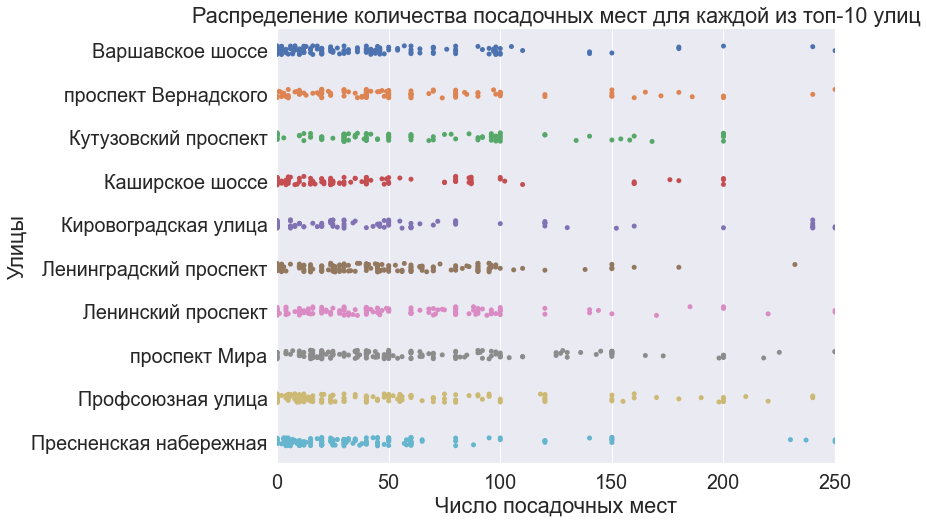

In [60]:
plt.figure(figsize=(10, 8))

ax = sns.stripplot(
    x='number', 
    y='street',
    data=df.query('street in @top_10_streets_list')
)
ax.set_title("Распределение количества посадочных мест для каждой из топ-10 улиц")
ax.set_xlabel('Число посадочных мест')
ax.set_ylabel('Улицы')
plt.xlim(0, 250)
#plt.savefig('saved_figure8.png', dpi = 100, bbox_inches='tight')
plt.show()

Намерено выставили ограничение по количеству посадочных мест в 250 для увеличения масштаба, а также потому что большее количество мест для такого нового проекта как наш, неактуально.
Распределение мест по улицам схоже, большая часть заведений имеет до 100 посадочных мест. Можем взглянуть на общее распределение.

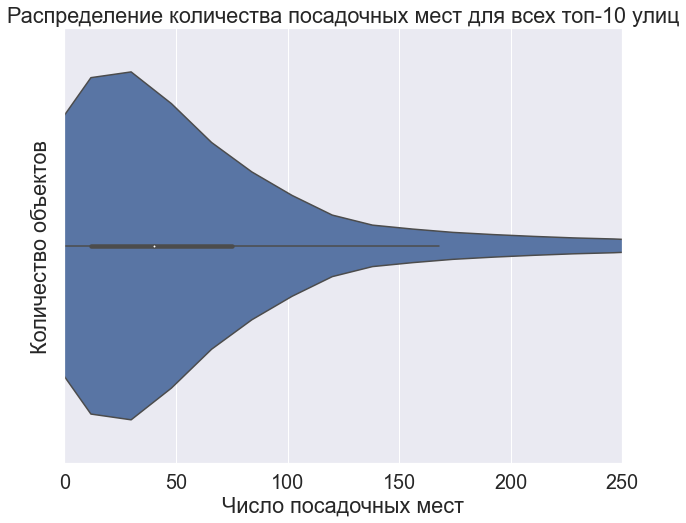

In [61]:
plt.figure(figsize=(10, 8))

ax = sns.violinplot(
    x='number',
    data=df.query('street in @top_10_streets_list')
)
ax.set_title("Распределение количества посадочных мест для всех топ-10 улиц")
ax.set_xlabel('Число посадочных мест')
ax.set_ylabel('Количество объектов')
plt.xlim(0, 250)
#plt.savefig('saved_figure9.png', dpi = 100, bbox_inches='tight')
plt.show()

Общее распределение посадочных мест среди заведений, находящихся на одной из 10 лидирующий улиц показывает, что большая часть заведений имеет до 40-50 посадочных мест. 
Меньшее число нам не подходит, т.к. к таким заведениям относятся маленькие кофейни и точки питания.
Более - нецелесообразно для нового заведения из-за высоких издержек. 

## Вывод. <a name="paragraph11"></a>

Мы проанализировали рынок заведений общественного питания г. Москвы. В процеесе было выявлено несколько особенностей, характерных для столицы. Так, большую часть рынка занимают объекты, относящиеся к типу КАФЕ, несетевых заведений в 4 раза больше сетевых, средняя посадка - 40 человек, а самая высокая концентрация точек питания сосредоточена на длинных улицах и в центральных районах Москвы. 


Исходя из полученных данных можно сформулировать тезисно несколько рекомендаций относительно будущего экспериментального заведения:

**Тип заведения лучше выбрать Кафе. Это самый популярный тип и при этом свободный, он не предполагает большого меню и помещения, как ресторан, что позволит съэкономить. При этом предполагает наличие облуживания, в отличие от небольших кофеен, где мы сможем внедрить нашу технологию с роботами.**

**Количество посадочных мест ограничить 40 местами. Это средний показатель для кафе и подходящий для тех территорий, которые мы будем рассматривать. Помимо этого стоит отталкиваться от стоимость аренды**

**Территория размещения должна обладать высокой проходимостью. Предлагаем выбрать район из тех, в которых проходит одна из ТОП-10 выделенных нами улиц, но при этом смещаться ближе к центру, т.к. там высокая концентрация людей (как местных жителей, так и туристов) и центр удобнее по транспортной доступности. Предлагаемые районы:** 

Мещанский район
Пресненский район
район Беговой 
район Дорогомилово
район Якиманка


## Презентация: 
https://drive.google.com/file/d/1GlLj3F02vbkETZqUUuGxmtgyoK7DwW2A/view?usp=sharing